### 2010 DATABASE ANALYSIS 

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
import mplleaflet

plt.style.use('fivethirtyeight')

In [3]:
chi_crime = pd.read_csv('Chicago_Crimes_2010_TO_31OCT16.csv', usecols=[0,2,4,5,6,7,8,9,17])
chi_crime.head()

,ID,Date,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Year
0,10508593,05/03/2016 09:00:00 PM,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,SIDEWALK,True,False,2016
1,10508594,05/03/2016 09:35:00 PM,0810,THEFT,OVER $500,APARTMENT,False,True,2016
2,10508595,05/03/2016 02:45:00 PM,0560,ASSAULT,SIMPLE,STREET,False,True,2016
3,10508597,05/03/2016 06:42:00 PM,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True,2016
4,10508598,05/03/2016 03:00:00 PM,0320,ROBBERY,STRONGARM - NO WEAPON,SIDEWALK,False,False,2016


In [4]:
chi_crime.dtypes

ID                       int64
Date                    object
IUCR                    object
Primary Type            object
Description             object
Location Description    object
Arrest                    bool
Domestic                  bool
Year                     int64
dtype: object

In [5]:
chi_crime.columns

Index(['ID', 'Date', 'IUCR', 'Primary Type', 'Description',
       'Location Description', 'Arrest', 'Domestic', 'Year'],
      dtype='object')

In [6]:
chi_crime2 = chi_crime.copy()

In [7]:
chi_crime2['Date'] = pd.to_datetime(chi_crime2['Date'], format='%m/%d/%Y %I:%M:%S %p')


In [8]:
chi_crime2['Date'].describe()

count                 2124947
unique                 812820
top       2012-01-01 00:01:00
freq                      164
first     2010-01-01 00:01:00
last      2016-10-31 23:58:00
Name: Date, dtype: object

In [9]:
chi_crime2.sort_values(by='Date').head()

,ID,Date,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Year
402644,7808351,2010-01-01 00:01:00,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,2010
753276,8360688,2010-01-01 00:01:00,0840,THEFT,FINANCIAL ID THEFT: OVER $300,APARTMENT,False,False,2010
188070,7476522,2010-01-01 00:01:00,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,STREET,False,False,2010
420052,7836844,2010-01-01 00:01:00,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,RESIDENCE,False,True,2010
5320,10523663,2010-01-01 00:01:00,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,2010


In [10]:
#  list of Violent crimes per IUCR Codes 
violent_list = ['0110','0130','0261','0262','0263','0264','0265','0266',
                                               '0271','0272','0273','0274','0275','0281','0291','1753',
                                               '1754','0312','0313','031A','031B','0320','0325','0326',
                                               '0330','0331','0334','0337','033A','033B','0340','041A',
                                               '041B','0420','0430','0450','0451','0452','0453','0461',
                                               '0462','0479','0480','0481','0482','0483','0485','0488',
                                               '0489','0490','0491','0492','0493','0495','0496','0497',
                                               '0498','0510','051A','051B','0520','0530','0550','0551',
                                               '0552','0553','0555','0556','0557','0558']

In [11]:
# add Violent column to Dataframe
chi_crime2['Violent'] = chi_crime2['IUCR'].isin(violent_list)
chi_crime2.dtypes

ID                               int64
Date                    datetime64[ns]
IUCR                            object
Primary Type                    object
Description                     object
Location Description            object
Arrest                            bool
Domestic                          bool
Year                             int64
Violent                           bool
dtype: object

In [12]:
chi_crime2['Violent'].value_counts()

False    1942407
True      182540
Name: Violent, dtype: int64

In [13]:
# add month, day of month, day of week, hour for time analysis below

chi_crime2['Hour'] = chi_crime2['Date'].map(lambda x: x.strftime("%H"))
chi_crime2['Day'] = chi_crime2['Date'].dt.dayofweek
chi_crime2['Month'] = chi_crime2['Date'].map(lambda x: x.strftime("%m"))
chi_crime2['Day_of_month'] = chi_crime2['Date'].map(lambda x: x.strftime("%d"))

In [14]:
chiviol = chi_crime2[chi_crime2['Violent'] == True]
chinonviol = chi_crime2[chi_crime2['Violent'] == False]

In [15]:
chiviol.Violent.sum()

182540

In [16]:
chihom = chiviol[chiviol['Primary Type'] == 'HOMICIDE']
chihom.Violent.sum()

3339

In [17]:
chihomdom = chihom[chihom['Domestic'] == True]
chivioldom = chiviol[chiviol['Domestic'] == True]
chivioldom.Violent.sum()

25535

Note for column rename:    df = df.rename(columns={'Old Name' : 'New Name'})

### Time of the Crime:  Hour, Day, Month Analysis
Start with days

In [18]:
# violent by day
viol_by_days = chiviol.groupby(['Day','Violent'])
viol_agg_days = viol_by_days.size().unstack()
viol_agg_days['Violent % per Day'] = viol_agg_days/chiviol.Violent.value_counts() 


In [19]:
# nonviolent by day
nonviol_by_days = chinonviol.groupby(['Day','Violent'])
nonviol_agg_days = nonviol_by_days.size().unstack()
nonviol_agg_days['Non-Violent % per Day'] = nonviol_agg_days/chinonviol.Violent.value_counts() 


In [20]:
# violent by primary type and month
grouped_month = pd.DataFrame(chiviol.groupby(['Month','Primary Type']).ID.count())
grouped_month.rename(columns = {'ID':'Incidence_Count'},inplace=True)
grouped_month['Incidence_pct'] = grouped_month['Incidence_Count'].groupby(level=1).transform(lambda x: x/x.sum())
grouped_month.reset_index(inplace=True)
grouped_month_wide = grouped_month.pivot(index='Month', columns='Primary Type', values='Incidence_pct')
grouped_month_wide

Primary Type,ASSAULT,BATTERY,CRIM SEXUAL ASSAULT,HOMICIDE,OFFENSE INVOLVING CHILDREN,ROBBERY
Month,,,,,,
01,0.066372,0.065104,0.085788,0.069182,0.168539,0.085430
02,0.063244,0.053486,0.066510,0.051812,0.062921,0.055877
03,0.082792,0.080588,0.080004,0.067385,0.080899,0.067740
04,0.087002,0.084963,0.076577,0.075172,0.069663,0.074100
05,0.099453,0.099334,0.091464,0.100329,0.083146,0.087111
06,0.097378,0.103842,0.099068,0.103324,0.093258,0.087196
07,0.100926,0.112197,0.096605,0.106020,0.078652,0.098212
08,0.095423,0.105652,0.098104,0.118299,0.092135,0.097667
09,0.093618,0.087849,0.087073,0.097934,0.060674,0.092033


In [21]:
# nonviolent by primary type and month
grouped_monthnv = pd.DataFrame(chinonviol.groupby(['Month','Primary Type']).ID.count())
grouped_monthnv.rename(columns = {'ID':'Incidence_Count'},inplace=True)
grouped_monthnv['Incidence_pct'] = grouped_monthnv['Incidence_Count'].groupby(level=1).transform(lambda x: x/x.sum())
grouped_monthnv.reset_index(inplace=True)
grouped_monthnv_wide = grouped_monthnv.pivot(index='Month', columns='Primary Type', values='Incidence_pct')
grouped_monthnv_wide

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIMINAL DAMAGE,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,GAMBLING,HOMICIDE,...,OFFENSE INVOLVING CHILDREN,OTHER NARCOTIC VIOLATION,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Month,,,,,,,,,,,,,,,,,,,,,
01,0.074509,0.070874,0.074771,0.079855,0.012658,0.073319,0.086860,0.084233,0.010597,0.083333,...,0.099812,0.025,0.088260,0.096268,0.037037,0.068705,0.096051,0.084556,0.076670,0.077012
02,0.053900,0.066989,0.067893,0.059127,0.075949,0.062692,0.077029,0.077464,0.018093,NaN,...,0.076552,0.075,0.078949,0.085170,0.049383,0.064293,0.064661,0.055220,0.063646,0.061627
03,0.088776,0.088558,0.088480,0.072560,0.088608,0.085093,0.090268,0.090060,0.045490,NaN,...,0.095053,0.050,0.091209,0.094499,0.049383,0.093129,0.078692,0.084556,0.077730,0.085058
04,0.093849,0.087201,0.085883,0.075408,0.075949,0.089200,0.085389,0.088166,0.094598,0.083333,...,0.084194,0.075,0.088853,0.081792,0.061728,0.088152,0.075076,0.087144,0.080393,0.086634
05,0.101141,0.099809,0.098994,0.087083,0.101266,0.094085,0.089355,0.083715,0.112432,NaN,...,0.090160,0.025,0.091999,0.080425,0.111111,0.104623,0.098510,0.086281,0.088062,0.098495
06,0.092898,0.098266,0.098441,0.087624,0.139241,0.092278,0.088480,0.086448,0.137245,0.250000,...,0.090696,0.150,0.088498,0.083802,0.135802,0.098671,0.099233,0.090595,0.092734,0.097085
07,0.107166,0.095551,0.097329,0.093702,0.113924,0.097052,0.089541,0.086075,0.158439,0.250000,...,0.083456,0.100,0.089162,0.087100,0.098765,0.092822,0.098655,0.088007,0.099100,0.098495
08,0.095751,0.095966,0.092458,0.100005,0.088608,0.093781,0.093098,0.089345,0.164125,NaN,...,0.081713,0.150,0.088924,0.097716,0.135802,0.086356,0.099957,0.086281,0.099335,0.095384
09,0.084337,0.089138,0.084872,0.093319,0.088608,0.087389,0.084235,0.085951,0.131300,0.083333,...,0.078563,0.100,0.078989,0.084365,0.086420,0.093437,0.091856,0.108714,0.091828,0.094638


In [22]:
# violent by primary type and HOUR
grouped_hour = pd.DataFrame(chiviol.groupby(['Hour','Primary Type']).ID.count())
grouped_hour.rename(columns = {'ID':'Incidence_Count'},inplace=True)
grouped_hour['Incidence_pct'] = grouped_hour['Incidence_Count'].groupby(level=1).transform(lambda x: x/x.sum())
grouped_hour.reset_index(inplace=True)
grouped_hour_wide = grouped_hour.pivot(index='Hour', columns='Primary Type', values='Incidence_pct')
grouped_hour_wide

Primary Type,ASSAULT,BATTERY,CRIM SEXUAL ASSAULT,HOMICIDE,OFFENSE INVOLVING CHILDREN,ROBBERY
Hour,,,,,,
00,0.042494,0.055881,0.133126,0.074274,0.435955,0.047498
01,0.034675,0.058390,0.059441,0.059898,0.023596,0.044136
02,0.030164,0.053769,0.064796,0.057203,0.019101,0.042467
03,0.023788,0.045641,0.059655,0.044025,0.012360,0.036675
04,0.016931,0.030572,0.050980,0.032046,0.007865,0.028767
05,0.013834,0.019558,0.035343,0.035040,0.006742,0.022999
06,0.014946,0.013881,0.027418,0.023360,0.012360,0.018791
07,0.019157,0.014597,0.020563,0.022462,0.016854,0.018682
08,0.029923,0.018822,0.021634,0.019167,0.044944,0.021415


In [23]:
# nonviolent by primary type and HOUR
grouped_hournv = pd.DataFrame(chinonviol.groupby(['Hour','Primary Type']).ID.count())
grouped_hournv.rename(columns = {'ID':'Incidence_Count'},inplace=True)
grouped_hournv['Incidence_pct'] = grouped_hournv['Incidence_Count'].groupby(level=1).transform(lambda x: x/x.sum())
grouped_hournv.reset_index(inplace=True)
grouped_hournv_wide = grouped_hournv.pivot(index='Hour', columns='Primary Type', values='Incidence_pct')
grouped_hournv_wide

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIMINAL DAMAGE,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,GAMBLING,HOMICIDE,...,OFFENSE INVOLVING CHILDREN,OTHER NARCOTIC VIOLATION,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Hour,,,,,,,,,,,,,,,,,,,,,
00,0.081167,0.027175,0.047004,0.036205,0.075949,0.064306,0.033273,0.103131,0.021711,0.083333,...,0.116437,0.025,0.048486,0.040695,0.012346,0.036482,0.120208,0.063848,0.048794,0.064281
01,0.082752,0.021186,0.046625,0.020240,0.050633,0.041729,0.025267,0.013599,0.009822,NaN,...,0.013608,NaN,0.022251,0.025092,0.037037,0.029093,0.029799,0.027610,0.023501,0.039522
02,0.083386,0.017560,0.042549,0.018557,0.063291,0.036563,0.020482,0.012854,0.003102,NaN,...,0.008044,NaN,0.017239,0.026138,0.024691,0.021858,0.024881,0.012079,0.019057,0.025090
03,0.073557,0.013043,0.034816,0.018550,0.025316,0.031691,0.016050,0.010722,0.001551,0.250000,...,0.006435,0.025,0.013374,0.016246,NaN,0.014675,0.026761,0.015531,0.015633,0.016713
04,0.069753,0.008785,0.024467,0.018377,0.025316,0.024806,0.013369,0.007721,0.001292,NaN,...,0.005899,NaN,0.010363,0.009088,0.012346,0.009133,0.017648,0.010354,0.011729,0.010078
05,0.052632,0.008008,0.017223,0.021945,0.050633,0.019965,0.010632,0.006603,0.000258,NaN,...,0.007173,NaN,0.011272,0.016165,0.012346,0.004156,0.016635,0.014668,0.011010,0.004894
06,0.039315,0.011552,0.016221,0.032847,0.025316,0.020911,0.014672,0.008787,0.001292,NaN,...,0.011932,NaN,0.016568,0.045842,0.012346,0.006003,0.018516,0.027610,0.015008,0.009414
07,0.026633,0.021300,0.020428,0.056948,0.037975,0.026380,0.024243,0.014510,0.001809,NaN,...,0.025942,NaN,0.027025,0.052919,0.074074,0.009493,0.034573,0.048318,0.023776,0.011239
08,0.018389,0.037473,0.028989,0.070923,0.037975,0.033485,0.029698,0.048259,0.002068,0.083333,...,0.048264,NaN,0.045347,0.073508,0.024691,0.018369,0.048893,0.058671,0.037694,0.018869


In [24]:
# violent by month
viol_by_months = chiviol.groupby(['Month', 'Violent'])
viol_agg_months = viol_by_months.size().unstack()
viol_agg_months['Violent % per Month'] = viol_agg_months/chiviol.Violent.sum() 
viol_agg_months

Violent,True,Violent % per Month
Month,,
01,13906,0.076181
02,10410,0.057029
03,13672,0.074899
04,14554,0.079730
05,17041,0.093355
06,17308,0.094818
07,18753,0.102734
08,18245,0.099951
09,16576,0.090807


In [25]:
# Non-violent by month
nonviol_by_months = chinonviol.groupby(['Month', 'Violent'])
nonviol_agg_months = nonviol_by_months.size().unstack()
nonviol_agg_months['Non-Violent % per Month'] = nonviol_agg_months/chinonviol.Violent.value_counts() 
nonviol_agg_months

Violent,False,Non-Violent % per Month
Month,,
01,154613,0.079599
02,134776,0.069386
03,166312,0.085622
04,164209,0.084539
05,177559,0.091412
06,178119,0.091700
07,183496,0.094468
08,181996,0.093696
09,169147,0.087081


In [26]:
# domestic homicide by hour
dhviol_by_hour = chihomdom.groupby(['Hour', 'Violent'])
dhviol_agg_hours = dhviol_by_hour.size().unstack()
dhviol_agg_hours['Indexed'] = dhviol_agg_hours/chihomdom.Violent.sum() 
dhviol_agg_hours

Violent,True,Indexed
Hour,,
00,23,0.108491
01,8,0.037736
02,8,0.037736
03,5,0.023585
04,13,0.061321
05,11,0.051887
06,3,0.014151
07,5,0.023585
08,10,0.047170


In [27]:
# domestic violent crime by hour
dviol_by_hour = chivioldom.groupby(['Hour', 'Violent'])
dviol_agg_hours = dviol_by_hour.size().unstack()
dviol_agg_hours['Indexed'] = dviol_agg_hours/chivioldom.Violent.sum() 
dviol_agg_hours

Violent,True,Indexed
Hour,,
00,1637,0.064108
01,1246,0.048796
02,1084,0.042452
03,912,0.035716
04,688,0.026943
05,553,0.021657
06,537,0.021030
07,625,0.024476
08,802,0.031408


In [28]:
# violent by hour
viol_by_hour = chiviol.groupby(['Hour', 'Violent'])
viol_agg_hours = viol_by_hour.size().unstack()
viol_agg_hours['Violent % per Hour'] = viol_agg_hours/chiviol.Violent.sum() 

viol_agg_hours

Violent,True,Violent % per Hour
Hour,,
00,10183,0.055785
01,8675,0.047524
02,8179,0.044807
03,6959,0.038123
04,5153,0.028229
05,3852,0.021102
06,3132,0.017158
07,3238,0.017739
08,4070,0.022296


In [29]:
# nonviolent by hour
nonviol_by_hour = chinonviol.groupby(['Hour', 'Violent'])
nonviol_agg_hours = nonviol_by_hour.size().unstack()
nonviol_agg_hours['Non-Violent % per Hour'] = nonviol_agg_hours/chinonviol.Violent.value_counts() 
nonviol_agg_hours

Violent,False,Non-Violent % per Hour
Hour,,
00,97731,0.050314
01,56421,0.029047
02,47101,0.024249
03,38310,0.019723
04,28777,0.014815
05,24801,0.012768
06,32305,0.016631
07,46552,0.023966
08,70206,0.036144


In [30]:
#domestic violence by hour  
domviol_by_hour = chivioldom.groupby(['Hour', 'Violent'])
domviol_agg_hours = domviol_by_hour.size().unstack()
domviol_agg_hours['Domestic Violent % per Hour'] = domviol_agg_hours/chivioldom.Violent.sum() 

domviol_agg_hours

Violent,True,Domestic Violent % per Hour
Hour,,
00,1637,0.064108
01,1246,0.048796
02,1084,0.042452
03,912,0.035716
04,688,0.026943
05,553,0.021657
06,537,0.021030
07,625,0.024476
08,802,0.031408


second axis code if needed:
 = nonviol_agg_days#ax2 = ax.twinx()
#ax2.legend(loc = 'upper center')
#ax.set_ylim(ymin = 24000, ymax=30000)
#ax2.set_ylim(ymin = 240000, ymax=300000)

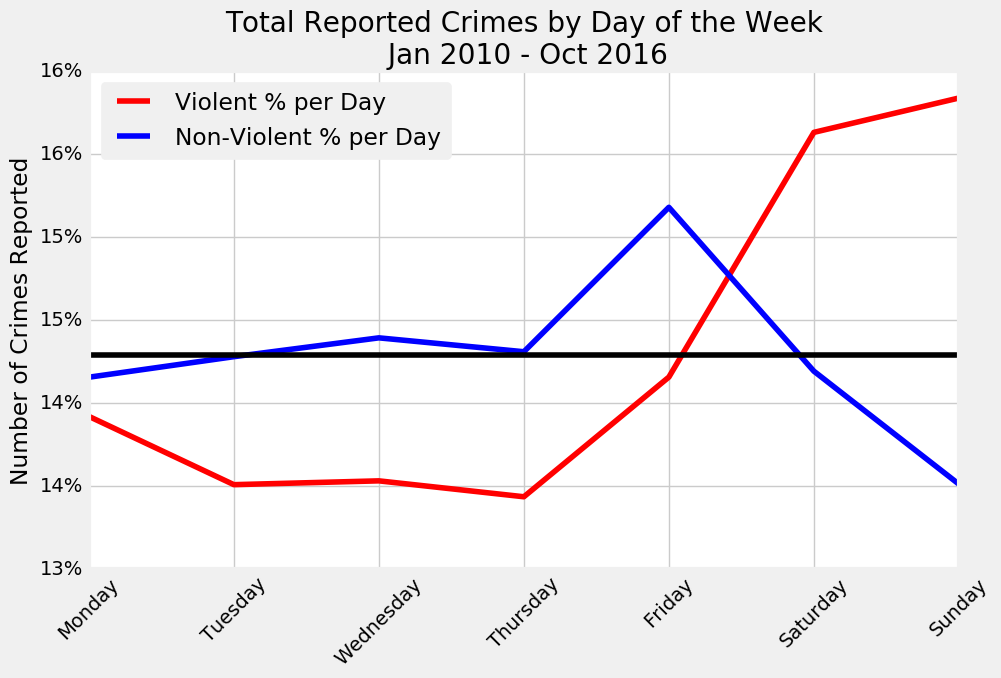

In [31]:
#  Crime by Day of the Week
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(viol_agg_days['Violent % per Day'],  color = 'r')
ax.plot(nonviol_agg_days['Non-Violent % per Day'],  color = 'b')

ax.set_title("Total Reported Crimes by Day of the Week\n Jan 2010 - Oct 2016")
ax.set_ylabel('Number of Crimes Reported')
ax.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation = 45)
ax.set_axis_bgcolor('white')
ax.legend(loc = 'upper left')
vals = ax.get_yticks()
ax.set_yticklabels(['{:2.0f}%'.format(x*100) for x in vals])
plt.axhline(0.14285, color = 'black')
plt.savefig('day_of_week_indexed_chart.png', bbox_inches = 'tight')

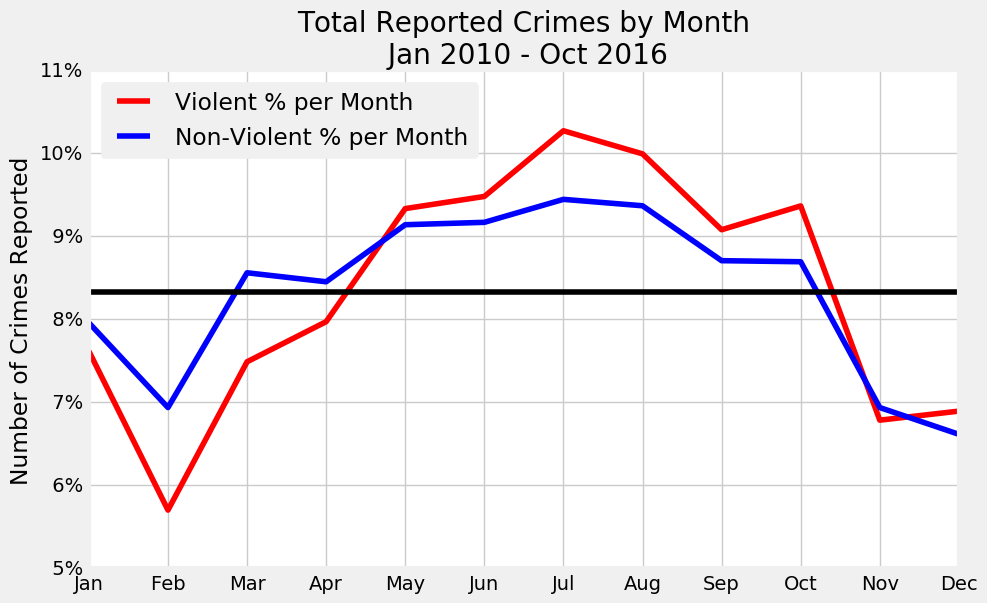

In [32]:
#  Crime by Month
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(viol_agg_months['Violent % per Month'],  color = 'r')
ax.plot(nonviol_agg_months['Non-Violent % per Month'],  color = 'b')

ax.set_title("Total Reported Crimes by Month\n Jan 2010 - Oct 2016")
ax.set_ylabel('Number of Crimes Reported')
ax.set_xlim([1,12])
ax.xaxis.set_major_locator(mtick.MultipleLocator(1))
ax.set_xticklabels(['','Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug','Sep','Oct','Nov','Dec'])
ax.set_axis_bgcolor('white')
ax.legend(loc = 'upper left')
vals = ax.get_yticks()
ax.set_yticklabels(['{:2.0f}%'.format(x*100) for x in vals])
plt.axhline(0.08333, color = 'black')
ax.set_axis_bgcolor('white')


plt.savefig('month_indexed_chart.png', bbox_inches = 'tight')

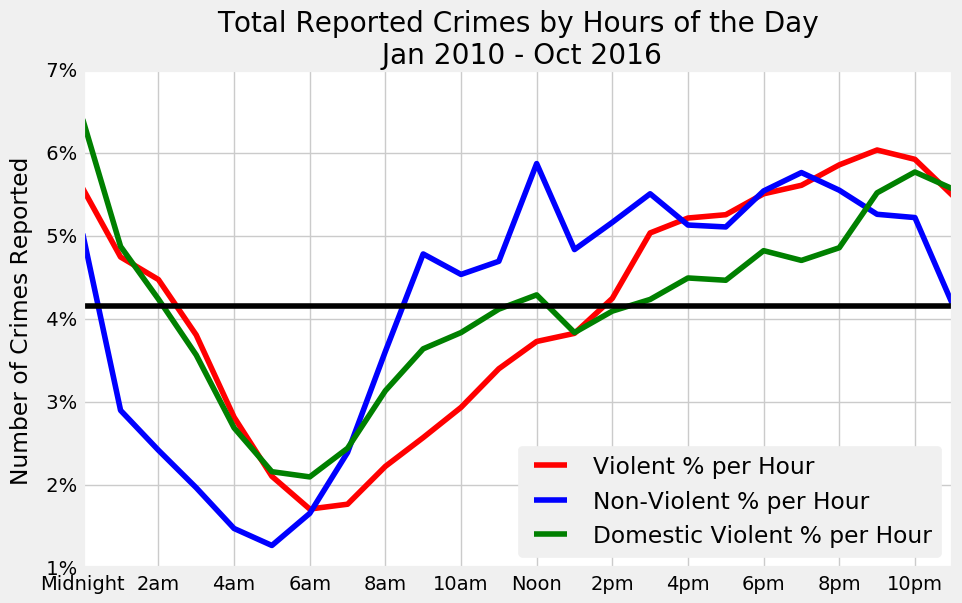

In [33]:
#  Crime by Hour of the Day
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(viol_agg_hours['Violent % per Hour'],  color = 'r')
ax.plot(nonviol_agg_hours['Non-Violent % per Hour'],  color = 'b')
ax.plot(domviol_agg_hours['Domestic Violent % per Hour'],  color = 'g')
ax.set_title("Total Reported Crimes by Hours of the Day\n Jan 2010 - Oct 2016")
ax.set_ylabel('Number of Crimes Reported')
ax.xaxis.set_major_locator(mtick.MultipleLocator(2))
ax.set_xlim([0,23])
ax.set_xticklabels(['','Midnight', '2am', '4am', '6am', '8am', '10am', 'Noon', '2pm', '4pm', '6pm', '8pm', '10pm'])
ax.set_axis_bgcolor('white')
ax.legend(loc = 'lower right')
vals = ax.get_yticks()
ax.set_yticklabels(['{:2.0f}%'.format(x*100) for x in vals])
plt.axhline(0.04166, color = 'black')
ax.set_axis_bgcolor('white')


plt.savefig('hour_indexed_chart.png', bbox_inches = 'tight')

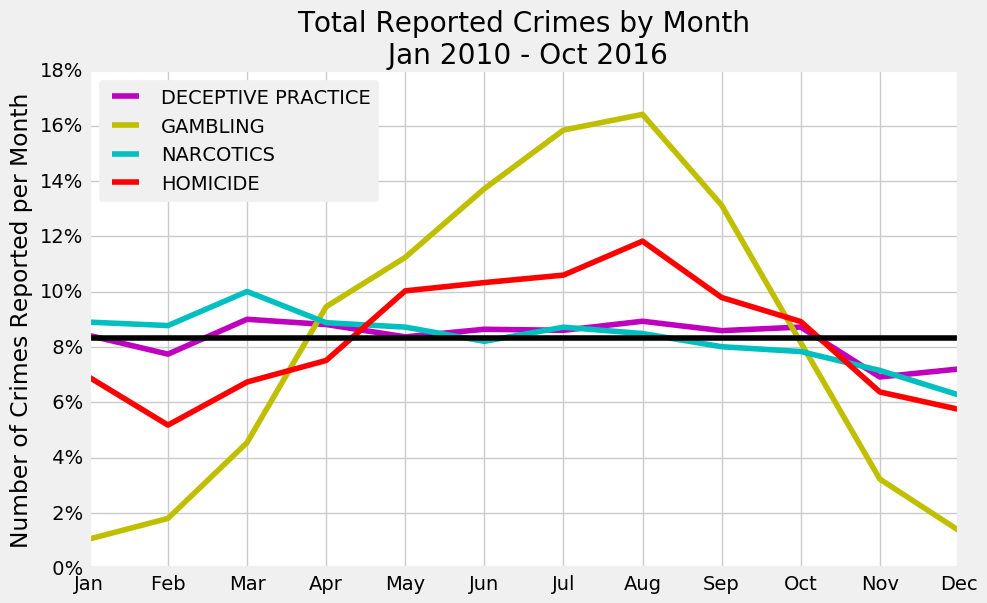

In [34]:
#  Sub - Crimes by Month
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(grouped_monthnv_wide['DECEPTIVE PRACTICE'],  color = 'm')
ax.plot(grouped_monthnv_wide['GAMBLING'],  color = 'y')
ax.plot(grouped_monthnv_wide['NARCOTICS'],  color = 'c')
ax.plot(grouped_month_wide['HOMICIDE'],  color = 'r')

ax.set_title("Total Reported Crimes by Month\n Jan 2010 - Oct 2016")
ax.set_ylabel('Number of Crimes Reported per Month')
ax.set_xlim([1,12])
ax.xaxis.set_major_locator(mtick.MultipleLocator(1))
ax.set_xticklabels(['','Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug','Sep','Oct','Nov','Dec'])
ax.set_axis_bgcolor('white')
ax.legend(loc = 'upper left', fontsize = 14)
vals = ax.get_yticks()
ax.set_yticklabels(['{:2.0f}%'.format(x*100) for x in vals])
plt.axhline(0.08333, color = 'black')
ax.set_axis_bgcolor('white')


plt.savefig('month_SUBSET_chart.png', bbox_inches = 'tight')

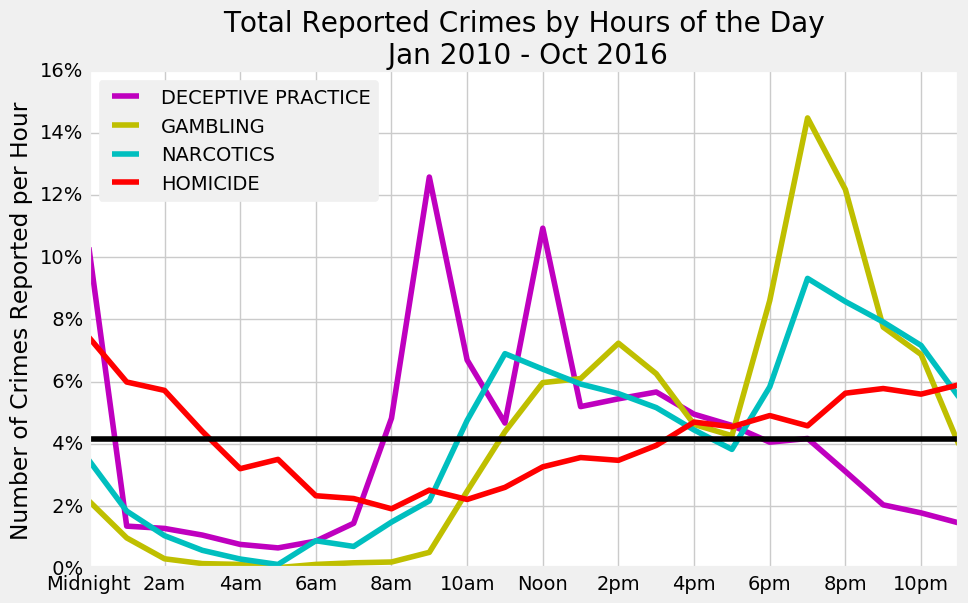

In [35]:
#  Sub - Crimes by Hour of the Day
fig, ax = plt.subplots(figsize=(10, 6))


ax.plot(grouped_hournv_wide['DECEPTIVE PRACTICE'],  color = 'm')
ax.plot(grouped_hournv_wide['GAMBLING'],  color = 'y')
ax.plot(grouped_hournv_wide['NARCOTICS'],  color = 'c')
ax.plot(grouped_hour_wide['HOMICIDE'],  color = 'r')
ax.set_title("Total Reported Crimes by Hours of the Day\n Jan 2010 - Oct 2016")
ax.set_ylabel('Number of Crimes Reported per Hour')
ax.xaxis.set_major_locator(mtick.MultipleLocator(2))
ax.set_xlim([0,23])
ax.set_xticklabels(['','Midnight', '2am', '4am', '6am', '8am', '10am', 'Noon', '2pm', '4pm', '6pm', '8pm', '10pm'])
ax.set_axis_bgcolor('white')
ax.legend(loc = 'upper left', fontsize = 14)
vals = ax.get_yticks()
ax.set_yticklabels(['{:2.0f}%'.format(x*100) for x in vals])
plt.axhline(0.04166, color = 'black')
ax.set_axis_bgcolor('white')


plt.savefig('hour_subset_chart.png', bbox_inches = 'tight')

### Year on Year Change Homicide

In [38]:
grouped_yr_mo_hom = pd.DataFrame(chihom.groupby(['Violent','Year','Month']).ID.count())
grouped_yr_mo_hom.reset_index(inplace=True)
grouped_yr_mo_hom.rename(columns = {'ID':'Incidence_Count'},inplace=True)
grouped_yr_mo_hom.head()

,Violent,Year,Month,Incidence_Count
0,True,2010,01,22
1,True,2010,02,22
2,True,2010,03,31
3,True,2010,04,46
4,True,2010,05,46


In [40]:
from datetime import datetime
grouped_yr_mo_hom['Year_Month'] = grouped_yr_mo_hom.apply(lambda row: datetime(row.Year, int(row.Month), 1), axis=1)


In [44]:
#  Year on year % change for violent and non violent crime 
grouped_yr_mo_hom['10m Rolling Average'] = grouped_yr_mo_hom['Incidence_Count'].rolling(window = 10, center = False).sum()
grouped_yr_mo_hom['yony_change'] = grouped_yr_mo_hom['10m Rolling Average'].pct_change(periods = 12)
grouped_yr_mo_hom['yony_change'] 

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11         NaN
12         NaN
13         NaN
14         NaN
15         NaN
16         NaN
17         NaN
18         NaN
19         NaN
20         NaN
21   -0.052356
22   -0.055980
23   -0.025381
24    0.020460
25    0.073171
26    0.187861
27    0.238532
28    0.238390
29    0.324759
        ...   
52   -0.020649
53   -0.033537
54   -0.054381
55   -0.046377
56   -0.002874
57   -0.028090
58    0.061224
59    0.038147
60    0.045822
61    0.010899
62    0.055072
63    0.073964
64    0.123494
65    0.176656
66    0.220447
67    0.215805
68    0.227666
69    0.213873
70    0.175824
71    0.157480
72    0.182990
73    0.266846
74    0.282967
75    0.261708
76    0.260054
77    0.319035
78    0.298429
79    0.397500
80    0.363850
81    0.497619
Name: yony_change, dtype: float64